# Computation of the GOGO similarity of genes between files

In [1]:
import sys
sys.path.append("..")
import pannzer_out_api as poa
from matplotlib import pyplot

Let's load files. This notebook was designed for the chromosome 21 of human genome.

In [9]:
chr21_all_nrOFF = poa.parse_pannzer_annotation('../../data/pannzer_output/chr21.all.nr_off.out', 'all_nrOFF')
chr21_long_nrOFF = poa.parse_pannzer_annotation('../../data/pannzer_output/chr21.long.nr_off.out', 'long_nrOFF')

chr21_mane_nrOFF = poa.parse_pannzer_annotation('../../data/pannzer_output/chr21.mane.nr_off.out', 'chr21_mane_nrOFF')
chr21_best_nrOFF = poa.make_best_single_isoform_annotation(chr21_all_nrOFF)

In [15]:
gene_set = [gene for gene in chr21_mane_nrOFF.genes]
gene_set = [gene for gene in chr21_mane_nrOFF.genes if len(chr21_all_nrOFF.get_gene(gene).transcripts) > 1]
gogo_dir = '~/Software/GOGO'

In [16]:
lannot = [chr21_all_nrOFF, chr21_long_nrOFF, chr21_mane_nrOFF, chr21_best_nrOFF]

bp = []
for i in range(len(lannot)):
    ll = []
    for j in range(len(lannot)):
        ll.append(' ')
    bp.append(ll)
bp

with open('draft.txt','w') as txt_output:
    txt_output.write(f"COMPARISON\tGENE\tSIMBP\tSIMMF\tSIMCC\n")

In [17]:
for i in range(len(lannot)-1):
    annot_1 = lannot[i]
    bp[i][i] = 1
    for j in range(i+1,len(lannot)):
        annot_2 = lannot[j]
        comb = annot_1.name + '_X_' + annot_2.name
        sim = poa.gogo_similarity_between_annotation(annot_1, annot_2, gogo_dir, gene_set)
        with open('draft.txt','a') as txt_output:
            for gene in sim:
                txt_output.write(f"{comb}\t{gene}\t{sim[gene]['BP']}\t{sim[gene]['MF']}\t{sim[gene]['CC']}\n")
            msim = poa.mean_similarity(sim)
            bp[i][j]=msim['BP']

In [26]:
rhead = chead = [annot.name for annot in lannot]

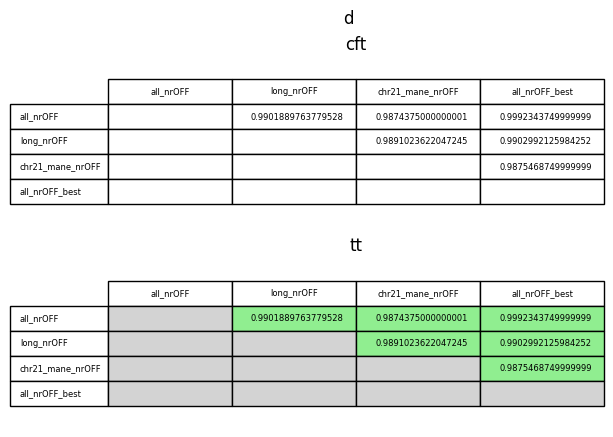

In [56]:
fig = pyplot.figure()
ax = fig.add_subplot(211)
ox = pyplot.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
pyplot.box(on=None)
pyplot.suptitle('tableplot')
ax.set_title('cft')

the_table = ax.table(bp, rowLabels=rhead, colLabels=chead, loc='center')
the_table.scale(1, 1.5)

ax = fig.add_subplot(212)
the_table = ax.table(bp, rowLabels=rhead, colLabels=chead, loc='center', cellColours=color)
the_table.scale(1, 1.5)
pyplot.box(on=None)
pyplot.suptitle('d')
ax.set_title('tt')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

pyplot.draw()


In [52]:
bp

[[' ', 0.9901889763779528, 0.9874375000000001, 0.9992343749999999],
 [' ', ' ', 0.9891023622047245, 0.9902992125984252],
 [' ', ' ', ' ', 0.9875468749999999],
 [' ', ' ', ' ', ' ']]

In [55]:
color = [['lightgrey', 'lightgreen', 'lightgreen', 'lightgreen'],
 ['lightgrey', 'lightgrey', 'lightgreen', 'lightgreen'],
 ['lightgrey', 'lightgrey', 'lightgrey', 'lightgreen'],
 ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']]